In [1]:
#Script created by Neha on 2022-10-04
#Script is designed to analyze Applebees Site traffic analysis on APP only
#Github repo: https://github.com/matt-walentosky-bt/applebees_user_pathing_analysis

In [1]:
#Import desired packages
import ga4_user_pathing
import pandas as pd
import os

In [2]:
#Parameters from Tyler Norris / Vanessa Schneider
# Globals:
COUNT_FIELD = 'counts' # DF fields references to aggregations value (users, sessions)
NODE_OPACITY = .9
LINK_OPACITY = .6
SEP_VAL = ' > '
KEY_PATH = '/Users/vanessaschneider/keys/dse-chase-user-pathing.json'

In [3]:
#Get working directory
os.getcwd()

'/Users/nehakhatri/Documents/GitHub/applebees_user_pathing_analysis'

In [11]:
#Read desired document
conversion_status = False

if conversion_status == True:
    df = pd.read_csv("APP_converters_user_pathing.csv")
else:
    df = pd.read_csv("APP_non_converters_user_pathing.csv")
    
#Note, we can only pull fraction of data from BQ into CSV format   

In [12]:
print(df.shape)
print("----")
print(df.head())

(9142, 3)
----
                         journey  conversion_flg  counts
0                           Menu           False    5029
1                  Quick_Reorder           False    4187
2         viewed_favourite_store           False    2572
3  viewed_favourite_store > Menu           False    2098
4                     Appetizers           False    2015


In [13]:
df['journey_length'] = df.apply(lambda x: len(x['journey'].split(SEP_VAL)), axis=1)

In [7]:
df.describe()

,counts,journey_length
count,9142.000000,9142.000000
mean,4.715489,8.292059
std,82.812863,5.014389
min,1.000000,1.000000
25%,1.000000,5.000000
50%,1.000000,7.000000
75%,1.000000,10.000000
max,5029.000000,70.000000


In [14]:
df.head(5)

,journey,conversion_flg,counts,journey_length
0,Menu,False,5029,1
1,Quick_Reorder,False,4187,1
2,viewed_favourite_store,False,2572,1
3,viewed_favourite_store > Menu,False,2098,2
4,Appetizers,False,2015,1


In [15]:
#Export the full dataset
df.to_csv('/Users/nehakhatri/Local_Python/Applebees/non_converters_full_data.csv')

<AxesSubplot: >

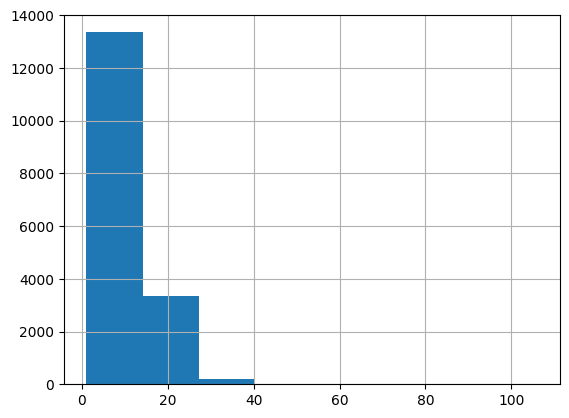

In [66]:
# Change min journey lenght and number of bins to further explore
df[df['journey_length'] > 0]['journey_length'].hist(bins=8)

<AxesSubplot: >

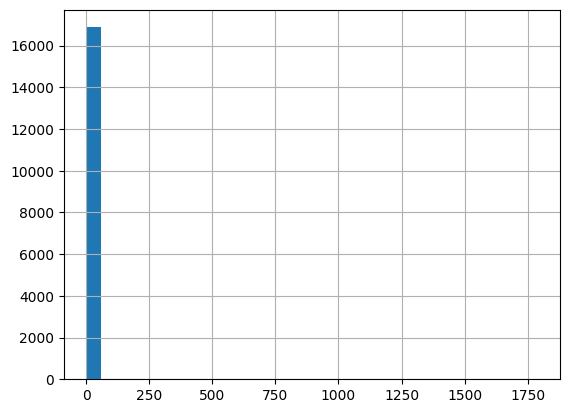

In [67]:
df[df['journey_length'] > 1]['counts'].hist(bins=30)

In [8]:
df.head(10)

,journey,conversion_flg,counts,journey_length
0,Menu,False,5029,1
1,Quick_Reorder,False,4187,1
2,viewed_favourite_store,False,2572,1
3,viewed_favourite_store > Menu,False,2098,2
4,Appetizers,False,2015,1
5,Menu > added_item,False,975,2
6,viewed_favourite_store > Appetizers,False,896,2
7,Appetizers > Menu,False,774,2
8,Menu > Appetizers,False,628,2
9,Drinks,False,618,1


In [9]:
df = ga4_user_pathing.add_journey_end_string(df, journey_col='journey', conversion_column='Conversion', sep_val=' > ')
df = ga4_user_pathing.parse_steps(df, sep_val=' > ', max_steps=10)

In [10]:
df['journey'][1]

'Quick_Reorder > Journey End'

In [ ]:
df_filtered.columns

In [ ]:
#df_filtered = ga4_user_pathing.remove_long_tail_jouneys(df, count_col='counts', min_path_count=10)

In [16]:
df_filtered = df[(df['journey_length'] >= 1) & (df['journey_length'] <= 6)]
df_filtered = df_filtered.sort_values('counts', ascending = False)
df_filtered = df_filtered.iloc[0:100,:]

In [17]:
df_filtered.head()

,journey,conversion_flg,counts,journey_length
0,Menu,False,5029,1
1,Quick_Reorder,False,4187,1
2,viewed_favourite_store,False,2572,1
3,viewed_favourite_store > Menu,False,2098,2
4,Appetizers,False,2015,1


In [91]:
df_filtered.columns

Index(['journey', 'conversion_flg', 'counts', 'journey_length', 'step_1',
       'step_2', 'step_3', 'step_4', 'step_5', 'step_6', 'step_7'],
      dtype='object')

In [92]:
df_sankey, df_index = ga4_user_pathing.generate_sankey_inputs(df_filtered, COUNT_FIELD, .9)

/Users/nehakhatri/Documents/GitHub/applebees_user_pathing_analysis/ga4_user_pathing.py:253: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/Users/nehakhatri/Documents/GitHub/applebees_user_pathing_analysis/ga4_user_pathing.py:261: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [93]:
df_sankey.head()

,source,target,counts,source_index,color,target_index
0,Appetizers,added_item,1515,6,"rgba(255, 177, 255, 0.9)",0
1,CheckoutActivity,Journey End,2713,5,"rgba(142, 231, 255, 0.9)",2
2,CheckoutViewController,Journey End,6947,3,"rgba(128, 68, 123, 0.9)",2
3,Menu,added_item,9686,1,"rgba(53, 41, 127, 0.9)",0
4,added_item,CheckoutActivity,2713,0,"rgba(142, 140, 153, 0.9)",5


In [94]:
df_filtered

,journey,conversion_flg,counts,journey_length,step_1,step_2,step_3,step_4,step_5,step_6,step_7
0,viewed_favourite_store > Menu > added_item > C...,True,1788,4,viewed_favourite_store,Menu,added_item,CheckoutViewController,Journey End,NaN,NaN
2,Menu > added_item > CheckoutViewController > J...,True,1490,3,Menu,added_item,CheckoutViewController,Journey End,NaN,NaN,NaN
3,Menu > added_item > CheckoutActivity > Journey...,True,1462,3,Menu,added_item,CheckoutActivity,Journey End,NaN,NaN,NaN
4,viewed_favourite_store > Menu > added_item > M...,True,945,6,viewed_favourite_store,Menu,added_item,Menu,added_item,CheckoutViewController,Journey End
5,viewed_favourite_store > added_item > Checkout...,True,932,3,viewed_favourite_store,added_item,CheckoutViewController,Journey End,NaN,NaN,NaN
6,Menu > added_item > Menu > added_item > Checko...,True,830,5,Menu,added_item,Menu,added_item,CheckoutActivity,Journey End,NaN
9,Menu > added_item > Menu > added_item > Checko...,True,698,5,Menu,added_item,Menu,added_item,CheckoutViewController,Journey End,NaN
11,viewed_favourite_store > Appetizers > added_it...,True,602,4,viewed_favourite_store,Appetizers,added_item,CheckoutViewController,Journey End,NaN,NaN
12,Appetizers > added_item > CheckoutViewControll...,True,492,3,Appetizers,added_item,CheckoutViewController,Journey End,NaN,NaN,NaN
13,Appetizers > added_item > CheckoutActivity > J...,True,421,3,Appetizers,added_item,CheckoutActivity,Journey End,NaN,NaN,NaN


In [95]:
ga4_user_pathing.display_sankey(df_sankey, df_index, count_field=COUNT_FIELD, link_opacity=.3)